# Basics of Symbolic Computing

An interactive version of this notebook can be [found on Binder](https://mybinder.org/v2/gh/CodyEthanJordan/TutorialNotebooks/master), and the original is hosted under [my TutorialNotebooks github](https://github.com/CodyEthanJordan/TutorialNotebooks/blob/master/Basics%20of%20Symbolic%20Computing.ipynb).

In [8]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
# https://stackoverflow.com/questions/20979993/how-to-pretty-print-in-ipython-notebook-via-sympy
from IPython.display import display

sym.init_printing() #used so that sympy can format equations in a nice way

## Solving Basic Equations

Consider the Ideal Gas Law as an example $PV=nRT$, how can we use SymPy to solve this?

Overall first we can create an equation with SymPy, and then use the [solve](https://docs.sympy.org/latest/modules/solvers/solvers.html) function to get what we want.

[Python for Undergraduate Engineers](https://pythonforundergradengineers.com/sympy-expressions-and-equations.html) has some good examples on this. Also take a look at the [SymPy gotchas](https://docs.sympy.org/latest/gotchas.html) for what to keep in mind when using symbolic computation, have to be somewhat careful about variables.

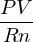

In [15]:
P, V, n, R, T = sym.symbols('P V n R T')
R_SIUnits = 8.31446261815324
IdealGas = sym.Eq(P*V, n*R*T)
display(IdealGas)

display(sym.solve(IdealGas, T)[0])
sym.solve(IdealGas, T)[0].subs(P, 1).subs(V, 2).subs(R, R_SIUnits).subs(n, 10).evalf()

## Doing Calculus

Solving basic algebraic equations isn't too difficult unless they are very large, but what about integrals and derivatives. [SymPy Gamma](https://gamma.sympy.org/input/?i=integrate+x) is a version of SymPy hosted online, which also provides step by step explainations for how to do integrals. [Wolfram Alpha](https://www.wolframalpha.com/) is very similar, and maybe a bit better, but not free.

We can also [do the integration directly in python](https://docs.sympy.org/latest/tutorial/calculus.html#integrals). Some advantages are
- being able to keep what you've done as a variable to use later
- easily create plots and graphs with Matplotlib
- runs pretty fast, simple to change variables or automate
- can be part of a bigger project
- straightfoward to export as LaTeX

Lets look at doing basic integrals, and then how to [find the volume of a solid of rotation](http://tutorial.math.lamar.edu/Classes/CalcI/VolumeWithRings.aspx)

What volume does $sin(x)$ from $0$ to $\pi$ have when rotated about the x-axis?


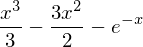

In [23]:
x = sym.symbols('x')
f = x**2 - 3*x + sym.exp(-x)
display(f)
int_f = sym.integrate(f, x)
display(int_f)

In [30]:
x = sym.symbols('x')
f = sym.sin(x)
display(f)
bounds = [0, sym.pi]

#volume = sym.integrate(sym.pi * f**2, (x, 0, sym.pi))
#expanding arguments, see https://stackoverflow.com/questions/3394835/use-of-args-and-kwargs
volume = sym.integrate(sym.pi * f**2, (x, *bounds))
print("Volume is")
display(volume)

Volume is


## Making it Fancy

Computing eigenvectors is important (but boring for a big matrix), that's why computers were invented.

$\left[\begin{matrix}1 & 2 & 1\\6 & -1 & 0\\-1 & -2 & -1\end{matrix}\right]$

Once we have the eigenvectors we can also [put it in LaTeX](https://docs.sympy.org/latest/tutorial/printing.html) and use that to make fancy looking [homework on Overleaft](https://www.overleaf.com/gallery/tagged/homework).

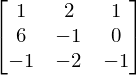

\left[\begin{matrix}1 & 2 & 1\\6 & -1 & 0\\-1 & -2 & -1\end{matrix}\right]


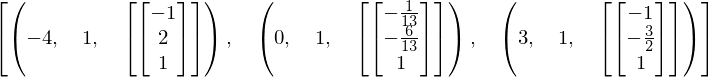

In [35]:
A = sym.Matrix([
    [1,2,1],
    [6,-1,0],
    [-1,-2,-1]])
display(A)
print(sym.latex(A))

A.eigenvects()

## Putting it Together

range

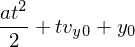

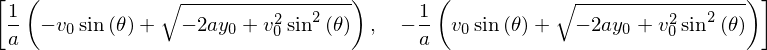

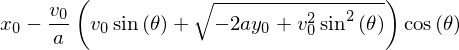

In [51]:
a, t, theta = sym.symbols('a t theta')
vy0, vx0, v0, y0, x0 = sym.symbols('v_{y0} v_{x0} v_0 y_0 x_0')
y = sym.Rational(1,2)*a*t**2 + vy0*t + y0
display(y)

x= vx0*t + x0

total_time = sym.solve(y.subs(vy0, v0*sym.sin(theta)) , t)
display(total_time)

total_time[1].subs(y0, 0).subs(theta, sym.pi/4).subs(v0, 5).subs(a, -9.8).evalf()

total_distance = x.subs(vx0, v0*sym.cos(theta)).subs(t, total_time[1])
display(total_distance)

total_distance.subs(y0, 0).subs(theta, sym.pi/4).subs(v0, 5).subs(a, -9.8).subs(x0, 0).evalf()

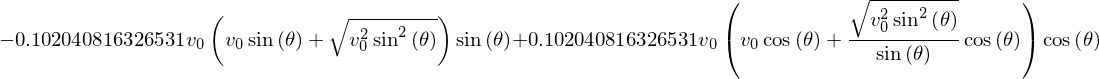

In [57]:
f = sym.diff(total_distance.subs(a, -9.8).subs(y0, 0).subs(x0, 0), theta)

In [58]:
sym.solve(f)